In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions


In [5]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB 1.4 MB/s eta 0:00:02
     -                                        0.1/1.4 MB 991.0 kB/s eta 0:00:02
     ---                                      0.1/1.4 MB 1.0 MB/s eta 0:00:02
     ----                                     0.2/1.4 MB 1.1 MB/s eta 0:00:02
     -----                                    0.2/1.4 MB 1.0 MB/s eta 0:00:02
     ------                                   0.2/1.4 MB 962.7 kB/s eta 0:00:02
     -------                                  0.3/1.4 MB 983.9 kB/s eta 0:00:02
     --------                                 0.3/1.4 MB 984.6 kB/s eta 0:00:02
     ----------                               0.4/1.4 MB 998.3 kB/s eta 0:00:02
     -----------                              0.4/1.4 MB 1.0 MB/s eta 0:00:02
     ------------                             0.5/1.4 MB 1.0 

In [12]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import  Adam


In [13]:
X,y = make_moons(100,noise=0.25,random_state=2)


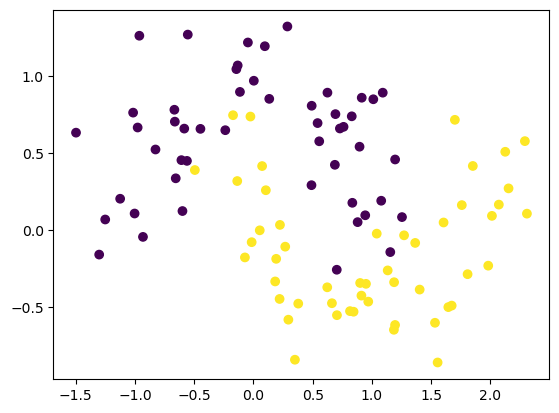

In [14]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [15]:
model=Sequential()

In [17]:
model.add(Dense(128,input_dim=2,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
adam=Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [20]:
history=model.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 5s 527us/step


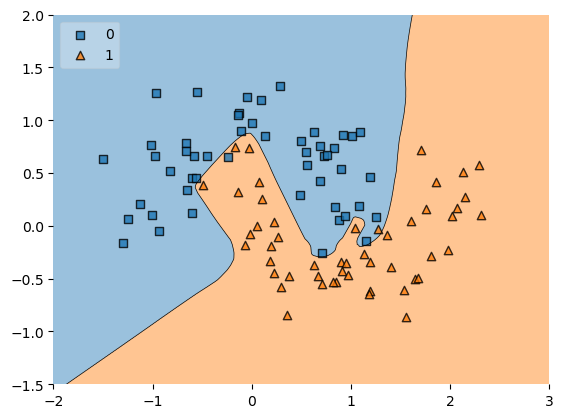

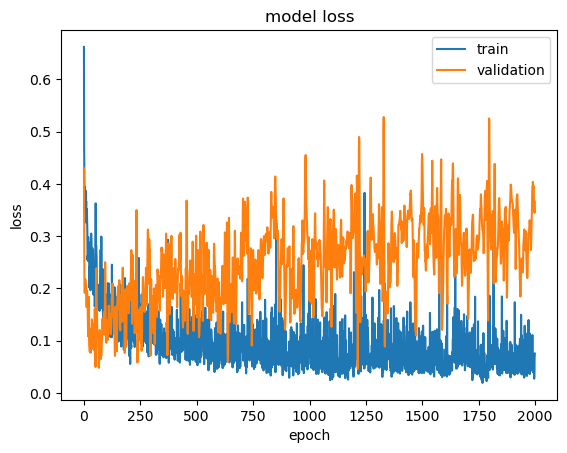

In [23]:
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show()

In [28]:
acc_model1 =history.history['accuracy'][-1]*100
acc_model1


96.24999761581421